# Milestone 1 

In [1]:
import pandas as pd
import numpy as np


Use the PRS dataset to create a dataframe

In [2]:
data = pd.read_csv("Final.csv")

Check the description of the dataframe

In [3]:
data.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


Check the shape of the dataframe

In [4]:
print(data.shape)

(1101925, 16)


Check the data frame informations

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

Check for the Null values in the dataframe

In [6]:
print(data.isnull().sum())

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64


Replace all the null values with "NaN"

In [7]:
data.replace(to_replace=[None, ''], value=np.nan, inplace=True)


Change the format of date columns - "ORDER_CREATION_DATE" to datetime[64] with the format as "%Y%m%d"

In [8]:
data['ORDER_CREATION_DATE'] = pd.to_datetime(data['ORDER_CREATION_DATE'], format='%Y%m%d')
print(data['ORDER_CREATION_DATE'])

0         2022-01-01
1         2022-01-01
2         2022-01-01
3         2022-01-01
4         2022-01-01
             ...    
1101920   2022-06-01
1101921   2022-06-01
1101922   2022-06-01
1101923   2022-06-01
1101924   2022-06-01
Name: ORDER_CREATION_DATE, Length: 1101925, dtype: datetime64[ns]


Do the same activity for the other date field i.e. "REQUESTED_DELIVERY_DATE" to datetime[64] with the format as "%Y%m%d"

In [9]:
data['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(data['REQUESTED_DELIVERY_DATE'], format='%Y%m%d')
print(data['REQUESTED_DELIVERY_DATE'])

0         2022-01-13
1         2022-01-11
2         2022-01-12
3         2022-01-06
4         2022-01-06
             ...    
1101920   2022-06-01
1101921   2022-06-01
1101922   2022-06-01
1101923   2022-06-01
1101924   2022-06-01
Name: REQUESTED_DELIVERY_DATE, Length: 1101925, dtype: datetime64[ns]


Sanity check - Check how many records are having order date greater than the delivery date

In [10]:
print((data['ORDER_CREATION_DATE'] > data['REQUESTED_DELIVERY_DATE']).sum())

27142


Remove those records where order date is greater than the delivery date 


In [11]:
data = data[data['ORDER_CREATION_DATE'] <= data['REQUESTED_DELIVERY_DATE']]

Check the number of records where the “ORDER_AMOUNT” field is having “-” in it.

In [12]:
print((data['ORDER_AMOUNT'].str.contains('-').sum()))

32


Replace “-” with “” from the “ORDER_AMOUNT” field. 

In [13]:
data['ORDER_AMOUNT'] = data['ORDER_AMOUNT'].astype(str).str.replace('-', '')


Check the number of records where the “ORDER_AMOUNT” field is having “,” in it..

In [14]:
print((data['ORDER_AMOUNT'].str.contains(',')).sum())

1073406


Replace “,” with “.” from the “ORDER_AMOUNT” field. 

In [15]:
data['ORDER_AMOUNT'] = data['ORDER_AMOUNT'].astype(str).str.replace(',', '.')
data['ORDER_AMOUNT'] = pd.to_numeric(data['ORDER_AMOUNT'], errors='coerce')
print(data['ORDER_AMOUNT'])

0            954.61
1            787.36
2          67493.46
3           1405.54
4              0.00
             ...   
1101920     4415.19
1101921        0.00
1101922        0.00
1101923        0.00
1101924     4415.19
Name: ORDER_AMOUNT, Length: 1074783, dtype: float64


Count the number of records where the order date and the delivery date are same

In [16]:
print((data['ORDER_CREATION_DATE'].dt.date == data['REQUESTED_DELIVERY_DATE'].dt.date).sum())

100437


Count the number of records for each currency type by using the field “'ORDER_CURRENCY'”

In [17]:
print(data['ORDER_CURRENCY'].value_counts())

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64


Create a new column in the existing dataframe as “'amount_in_usd'” and convert all the non-USD currencies in USD and store them in the same column. 

In [18]:
usd_conversion_rates = {
    'USD': 1.0,
    'EUR': 1.08,
    'AUD': 0.66,
    'CAD': 0.74,
    'GBP': 1.24,
    'MYR': 0.22,
    'PLN': 0.24,
    'AED': 0.27,
    'HKD': 0.13,
    'CHF': 1.11,
    'RON': 0.22,
    'SGD': 0.74,
    'CZK': 0.046,
    'HU1': 0.0028,
    'NZD': 0.61,
    'BHD': 2.65,
    'SAR': 0.27,
    'QAR': 0.27,
    'KWD': 3.25,
    'SEK': 0.094
}

data['AMOUNT_IN_USD'] = data.apply(lambda row: row['ORDER_AMOUNT'] * usd_conversion_rates.get(row['ORDER_CURRENCY'], np.nan), axis=1)
print(data['AMOUNT_IN_USD'])

0           1030.9788
1            850.3488
2          72892.9368
3           1517.9832
4              0.0000
              ...    
1101920     3267.2406
1101921        0.0000
1101922        0.0000
1101923        0.0000
1101924     3267.2406
Name: AMOUNT_IN_USD, Length: 1074783, dtype: float64


Check for values “0” in the “'amount_in_usd” column. 

In [19]:
print((data['AMOUNT_IN_USD'] == 0).sum())

237821


Create a new column in the existing dataframe “unique_cust_id” by adding 'CUSTOMER_NUMBER' and 'COMPANY_CODE'

In [20]:
data['UNIQUE_CUST_ID'] = data['CUSTOMER_NUMBER'].astype(str) + data['COMPANY_CODE'].astype(str)
print(data['UNIQUE_CUST_ID'])

0            123118073220
1            123118073220
2            121187583260
3          12104997703290
4          12103514003290
                ...      
1101920    12103318044260
1101921    12103318044260
1101922    12103318114260
1101923    12103318114260
1101924    12103318044260
Name: UNIQUE_CUST_ID, Length: 1074783, dtype: object


In [21]:
data

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,AMOUNT_IN_USD,UNIQUE_CUST_ID
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,1030.9788,123118073220
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,850.3488,123118073220
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,72892.9368,121187583260
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1517.9832,12104997703290
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.0000,12103514003290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,4415.19,2022-06-01,SGD,NaN,1210331804,3267.2406,12103318044260
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,0.00,2022-06-01,SGD,NaN,1210331804,0.0000,12103318044260
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,0.00,2022-06-01,SGD,NaN,1210331811,0.0000,12103318114260
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,0.00,2022-06-01,SGD,NaN,1210331811,0.0000,12103318114260


# Milestone 2

# H2H10688K_Anusthan_Singh


Create a Histogram on DISTRIBUTION_CHANNEL


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([113986., 105301., 105698., 105441., 105172., 113914., 105461.,
        105534., 104869., 109407.]),
 array([  0. ,  24.2,  48.4,  72.6,  96.8, 121. , 145.2, 169.4, 193.6,
        217.8, 242. ]),
 <BarContainer object of 10 artists>)

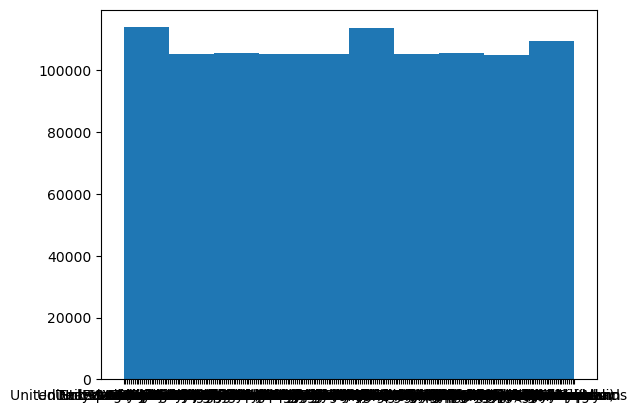

In [23]:
plt.hist(data['DISTRIBUTION_CHANNEL'])

<AxesSubplot: xlabel='DISTRIBUTION_CHANNEL', ylabel='Count'>

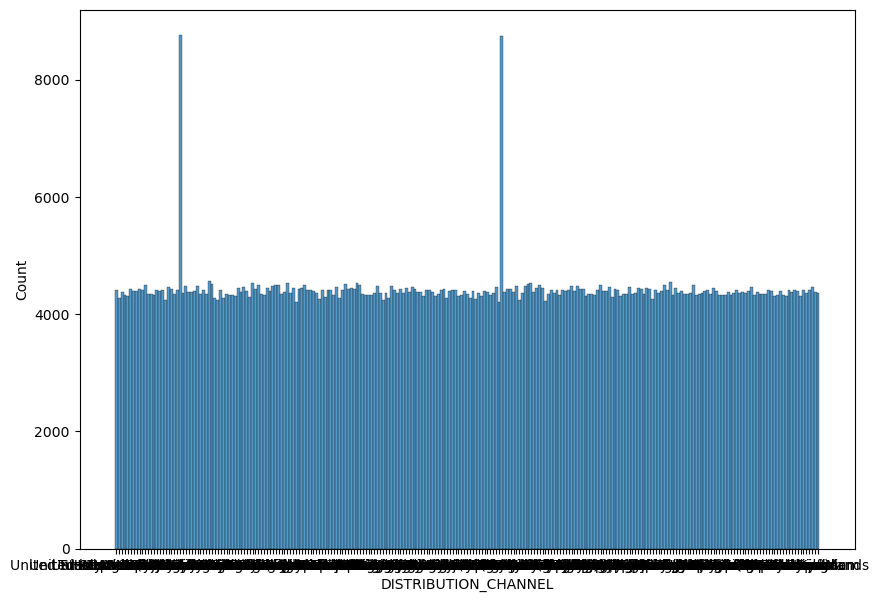

In [24]:
plt.figure(figsize=(10,7))
sns.histplot(x='DISTRIBUTION_CHANNEL',data=data)

Create a Pie Chart on ORDER_CURRENCY

([<matplotlib.patches.Wedge at 0x2448538fd00>,
 [Text(-1.0658712767129954, -0.2718794245216241, 'USD'),
  Text(1.0402177001255801, -0.3576969895672157, 'EUR'),
  Text(0.9100078323787862, 0.6179690485851724, 'AUD'),
  Text(0.6441746936528687, 0.8916495746969394, 'CAD'),
  Text(0.42865758096013606, 1.013041301371965, 'GBP'),
  Text(0.31996275082546566, 1.0524370945972026, 'MYR'),
  Text(0.23973867155033823, 1.0735573433046226, 'PLN'),
  Text(0.1775154247981876, 1.0855819978051953, 'AED'),
  Text(0.13279540619148877, 1.091954843431924, 'HKD'),
  Text(0.0961594900293749, 1.0957889178474525, 'CHF'),
  Text(0.0641251428117048, 1.098129302978196, 'RON'),
  Text(0.03637467674193952, 1.0993984186326262, 'SGD'),
  Text(0.01680911200198238, 1.0998715623897661, 'CZK'),
  Text(0.005379346749560051, 1.099986846570698, 'HU1'),
  Text(0.0006978886344743598, 1.099999778614275, 'NZD'),
  Text(0.00034099016157665077, 1.0999999471480486, 'BHD'),
  Text(0.0001930862772561474, 1.0999999830534952, 'SAR'),
  

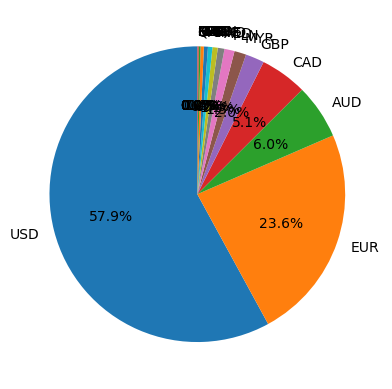

In [25]:
cur=data['ORDER_CURRENCY'].value_counts()
plt.pie(cur,labels=cur.index,autopct='%1.1f%%', startangle=90) 

Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL

<AxesSubplot: xlabel='PURCHASE_ORDER_TYPE', ylabel='DISTRIBUTION_CHANNEL'>

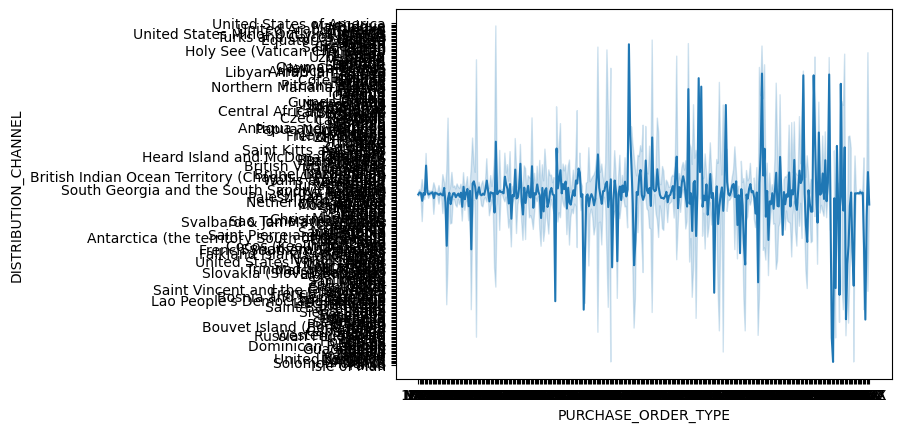

In [26]:
sns.lineplot(x='PURCHASE_ORDER_TYPE',y='DISTRIBUTION_CHANNEL',data=data)

Create a line plot on ORDER_CREATION_DATE and amount_in_usd

<AxesSubplot: xlabel='ORDER_CREATION_DATE', ylabel='AMOUNT_IN_USD'>

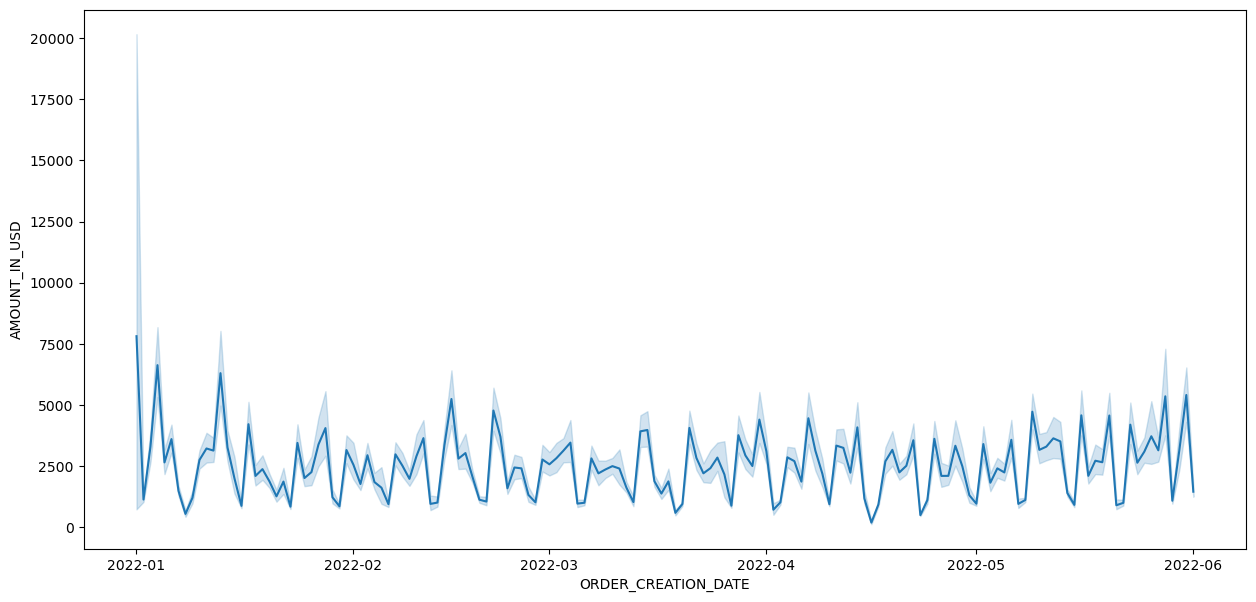

In [27]:
plt.figure(figsize=(15,7))
sns.lineplot(x='ORDER_CREATION_DATE',y='AMOUNT_IN_USD',data=data)

Create a boxplot on ORDER_AMOUNT to find out the outliers

<AxesSubplot: >

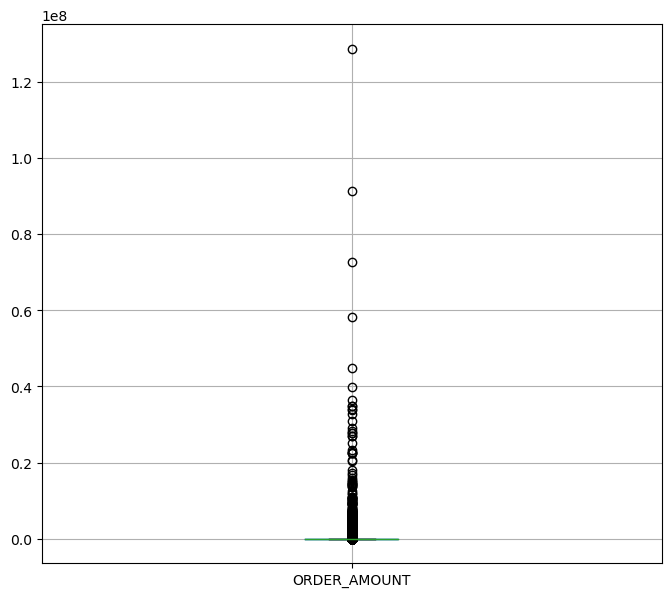

In [28]:
plt.figure(figsize=(8,7))
data.boxplot('ORDER_AMOUNT')

Create a barchart on COMPANY_CODE and ORDER_AMOUNT

<AxesSubplot: xlabel='COMPANY_CODE', ylabel='ORDER_AMOUNT'>

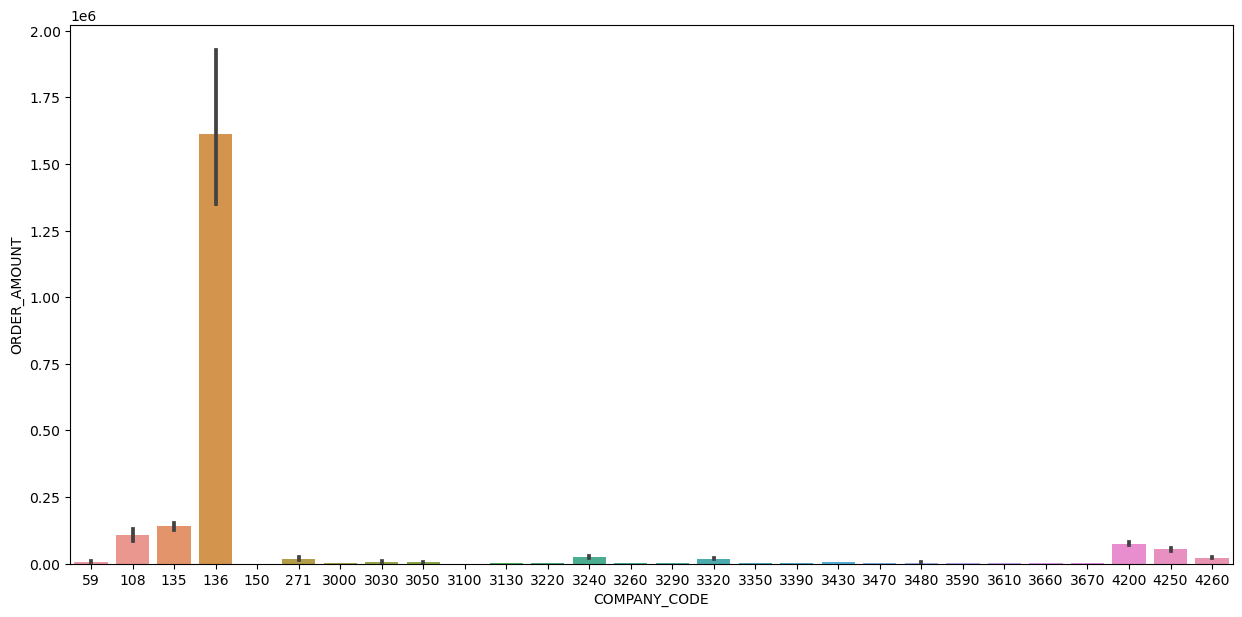

In [29]:
plt.figure(figsize=(15,7))
sns.barplot(x='COMPANY_CODE',y='ORDER_AMOUNT',data=data)

# Milestone 3 

# H2H10688K_Anusthan_Singh


In [30]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values, discussed in the sessions.

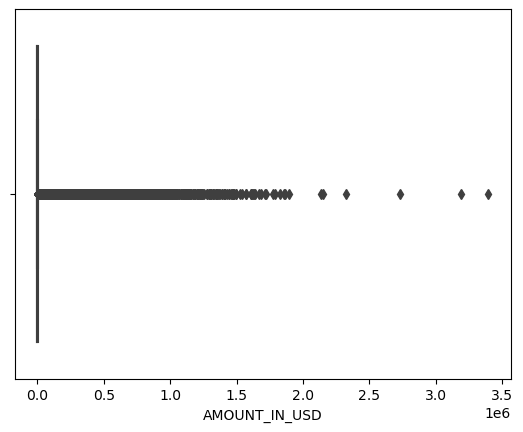

In [31]:
sns.boxplot(x=data['AMOUNT_IN_USD'])
median = data['AMOUNT_IN_USD'].median()
data['AMOUNT_IN_USD'] = data['AMOUNT_IN_USD'].mask(data['AMOUNT_IN_USD'] > 2000000, median)

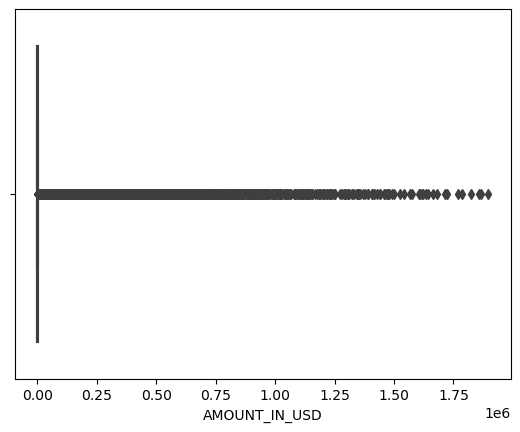

In [32]:
sns.boxplot(x=data['AMOUNT_IN_USD'])
plt.show()

Label encoding or One hot Encoding on all the categorical columns

In [33]:
categorical = []
continuous = []

for col in data.columns:
    if data[col].dtype == 'object':
        categorical.append(col)
    else:
        continuous.append(col)
        
le = LabelEncoder()

for col in categorical:
    data[col] = le.fit_transform(data[col])
data.head()    
        

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,AMOUNT_IN_USD,UNIQUE_CUST_ID
0,946851639,3537,232,1,1,0,3220,2022-01-01,43012,5,756141537,954.61,2022-01-13,6,NaN,12311807,1030.9788,6608
1,963432061,3449,135,1,1,0,3220,2022-01-01,43114,2,798847812,787.36,2022-01-11,6,NaN,12311807,850.3488,6608
2,971991639,3238,141,1,43496,204,3260,2022-01-01,110019,0,960984659,67493.46,2022-01-12,6,93.0,12118758,72892.9368,4405
3,754349803,3911,228,1,7852,255,3290,2022-01-01,153013,5,925857642,1405.54,2022-01-06,6,93.0,1210499770,1517.9832,4059
4,930253442,2381,82,1,1,255,3290,2022-01-01,160020,4,947942786,0.00,2022-01-06,6,64.0,1210351400,0.0000,2919


Log Transformations on continuous columns 

In [34]:
print(continuous)

['CUSTOMER_ORDER_ID', 'SALES_ORG', 'COMPANY_CODE', 'ORDER_CREATION_DATE', 'ORDER_CREATION_TIME', 'SOLD_TO_PARTY', 'ORDER_AMOUNT', 'REQUESTED_DELIVERY_DATE', 'CREDIT_STATUS', 'CUSTOMER_NUMBER', 'AMOUNT_IN_USD']


In [35]:

for col in continuous:
    if data[col].dtype in [np.float64, np.int64]:
        data[col] = data[col].apply(lambda x: np.log(x))
        
data.head()        

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,AMOUNT_IN_USD,UNIQUE_CUST_ID
0,20.668653,8.171034,232,1,1,0,8.077137,2022-01-01,10.669234,5,20.443739,6.861303,2022-01-13,6,NaN,16.326069,6.938264,6608
1,20.686013,8.145840,135,1,1,0,8.077137,2022-01-01,10.671603,2,20.498681,6.668686,2022-01-11,6,NaN,16.326069,6.745647,6608
2,20.694858,8.082711,141,1,43496,204,8.089482,2022-01-01,11.608408,0,20.683469,11.119786,2022-01-12,6,4.532599,16.310265,11.196747,4405
3,20.441367,8.271548,228,1,7852,255,8.098643,2022-01-01,11.938278,5,20.646231,7.248177,2022-01-06,6,4.532599,20.914299,7.325138,4059
4,20.650968,7.775276,82,1,1,255,8.098643,2022-01-01,11.983054,4,20.669805,-inf,2022-01-06,6,4.158883,20.914177,-inf,2919


Try to extract new features by grouping existing columns 


In [36]:
grouped_data = data.groupby('SALES_ORG').agg({
    'ORDER_AMOUNT': ['mean'],
    'RELEASED_CREDIT_VALUE': ['sum'],
    'CUSTOMER_NUMBER': ['nunique'],
    'AMOUNT_IN_USD': ['max']
}).reset_index()

grouped_data.columns = ['SALES_ORG', 'AVG_ORDER_AMOUNT', 'total_credit_value', 'unique_customers', 'max_amount_usd']

grouped_data

,SALES_ORG,AVG_ORDER_AMOUNT,total_credit_value,unique_customers,max_amount_usd
0,7.649693,NaN,609429,141,12.915910
1,7.650169,NaN,723167,129,11.876058
2,7.650645,NaN,594668,116,12.157586
3,7.651120,NaN,667986,124,11.312470
4,7.651596,NaN,806552,137,12.091408
...,...,...,...,...,...
2406,8.413165,NaN,613023,143,13.351494
2407,8.413387,NaN,620833,122,11.434042
2408,8.413609,NaN,775251,139,12.910884
2409,8.413831,NaN,487248,146,12.919008


Create a heatmap to find correlation between the columns

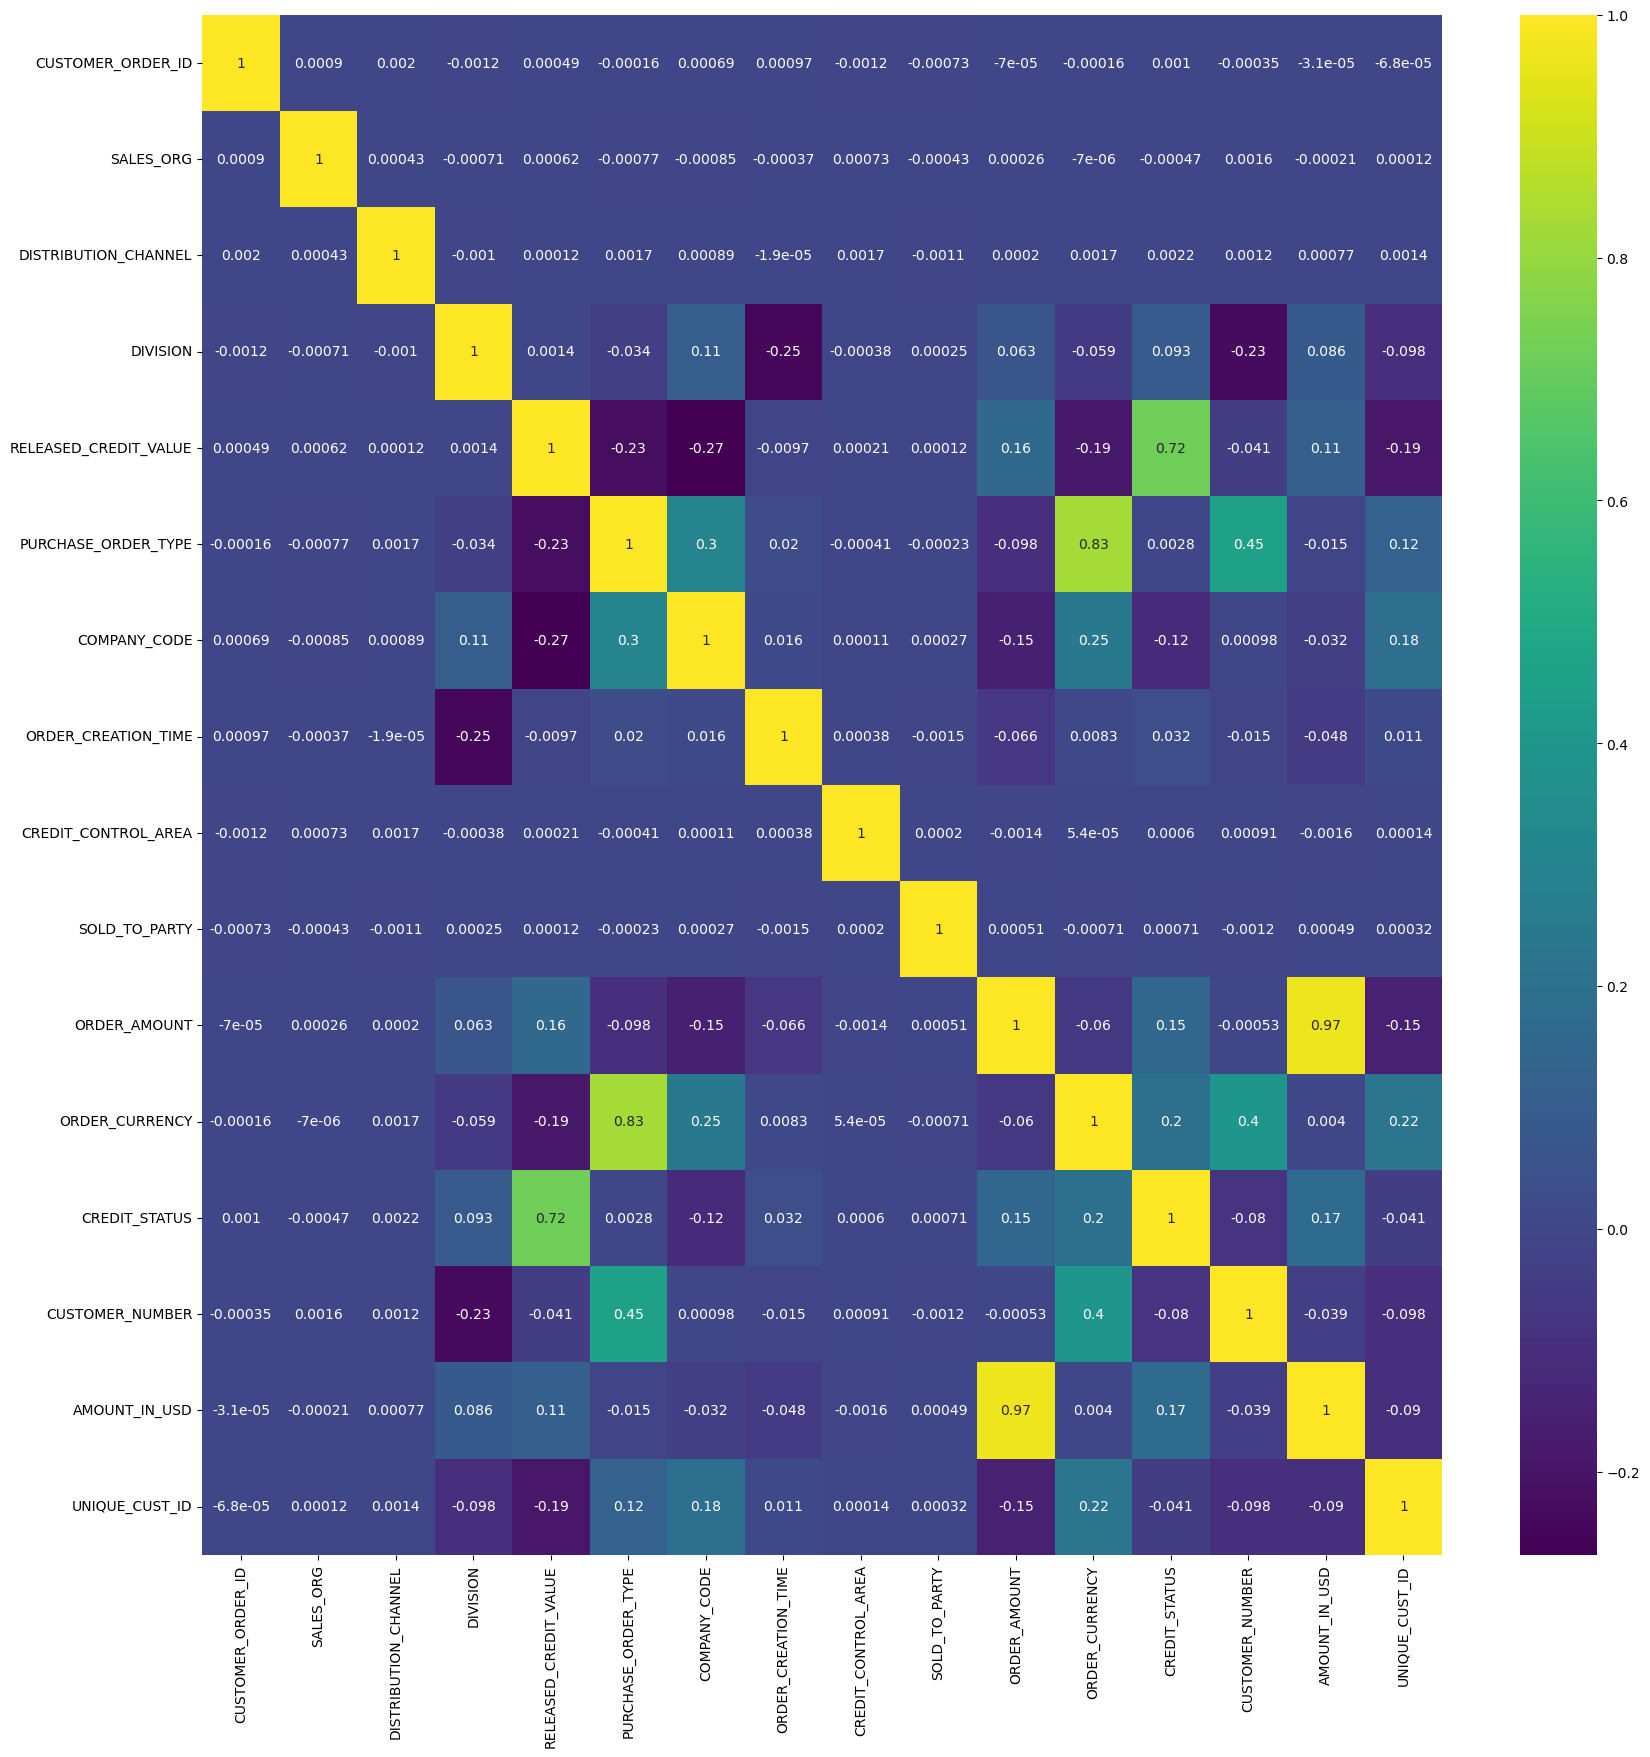

In [37]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.show()

Try to identify important or relevant columns for feature extraction


In [38]:
corr_matrix = data.corr().abs()
high_corr_var = np.where(corr_matrix > 0.7)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
print(high_corr_var)


[('RELEASED_CREDIT_VALUE', 'CREDIT_STATUS'), ('PURCHASE_ORDER_TYPE', 'ORDER_CURRENCY'), ('ORDER_AMOUNT', 'AMOUNT_IN_USD')]


# Milestone 4

# H2H10688K_Anusthan_Singh


 Modify the dataset to pass into any type of machine learning models. 

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.utils import all_estimators
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score
from sklearn.model_selection import GridSearchCV


In [40]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
num_cols = [col for col in data.columns if data[col].dtype != 'object']

In [41]:
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])
    

In [42]:
data.rename(columns = {'ORDER_AMOUNT': 'target'}, inplace = True)

In [43]:
data['ORDER_CREATION_DATE'] = data['ORDER_CREATION_DATE'].astype('int64') / 10**9
data['ORDER_CREATION_DATE'] = data['ORDER_CREATION_DATE'].astype('float64')

data['REQUESTED_DELIVERY_DATE'] = data['REQUESTED_DELIVERY_DATE'].astype('int64') / 10**9
data['REQUESTED_DELIVERY_DATE'] = data['REQUESTED_DELIVERY_DATE'].astype('float64')

In [44]:
data.replace(-np.inf, np.nan, inplace=True)
data.dropna(inplace = True)

X = data.drop(columns = ['target'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 355)

data.head()


,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,target,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,AMOUNT_IN_USD,UNIQUE_CUST_ID
2,20.694858,8.082711,141,1,43496,204,8.089482,1.640995e+09,11.608408,0,20.683469,11.119786,1.641946e+09,6,4.532599,16.310265,11.196747,4405
3,20.441367,8.271548,228,1,7852,255,8.098643,1.640995e+09,11.938278,5,20.646231,7.248177,1.641427e+09,6,4.532599,20.914299,7.325138,4059
5,20.524500,8.190077,9,1,1,270,8.098643,1.640995e+09,11.983073,3,20.484181,6.971040,1.641514e+09,6,4.158883,20.913989,7.048001,1092
7,20.596971,8.201112,10,0,1,291,8.151910,1.641082e+09,11.608436,3,20.600748,5.713238,1.641427e+09,6,4.158883,16.326016,5.790199,6587
9,20.679518,8.055158,230,1,1,264,8.098643,1.641082e+09,11.798210,2,20.619970,6.302344,1.641514e+09,6,4.158883,20.914038,6.379305,2563


 Try different machine learning models like -
    - Linear Regression
    - Support Vector Machine
    - Decision Tree
    - Random Forest
    - AdaBoost
    - Xgboost etc.


In [45]:
regressor_models = []
for name, RegressorClass in all_estimators(type_filter='regressor'):
    try:
        regressor = RegressorClass()
        regressor_models.append((name, regressor))
    except Exception as e:
        pass

regressor_models.pop(33)
regressor_models.pop(46)


('SVR', SVR())

Perform Regression model evaluations like MSE, RMSE, R-Square etc.

In [46]:
def eval(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return model.__class__.__name__, model, mse, rmse, r2

In [47]:
df_compare = pd.DataFrame(columns = ['Regressor', 'Model', 'MSE', 'RMSE', 'R2'])
best_model = pd.DataFrame(columns = ['Regressor', 'Model', 'MSE', 'RMSE', 'R2'])


In [48]:
for model in regressor_models:
    try:
        ans = eval(model[1], X_train, y_train, X_test, y_test)
        df_compare = pd.concat([df_compare, pd.DataFrame([[ans[1], ans[0], ans[2], ans[3], ans[4]]], columns = ['Regressor', 'Model', 'MSE', 'RMSE', 'R2'])])
    except Exception as e:
        pass

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:245: FutureWarning: As of version 0.24, n_components(2) should be in [1, min(n_features, n_samples, n_targets)] = [1, 1]. n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\KIIT\anac

Compare the accuracies of all the models 

In [55]:
df_compare

,Regressor,Model,MSE,RMSE,R2
0,"(ExtraTreeRegressor(random_state=488204610), E...",ExtraTreesRegressor,3.991210e-03,6.317603e-02,9.989833e-01
0,"(DecisionTreeRegressor(max_features='auto', ra...",RandomForestRegressor,4.673128e-03,6.836028e-02,9.988096e-01
0,(DecisionTreeRegressor(random_state=172928921)...,BaggingRegressor,4.994274e-03,7.067018e-02,9.987278e-01
0,DecisionTreeRegressor(),DecisionTreeRegressor,6.692890e-03,8.181009e-02,9.982951e-01
0,ExtraTreeRegressor(),ExtraTreeRegressor,7.164015e-03,8.464051e-02,9.981751e-01
0,HistGradientBoostingRegressor(),HistGradientBoostingRegressor,7.887461e-03,8.881138e-02,9.979908e-01
0,([DecisionTreeRegressor(criterion='friedman_ms...,GradientBoostingRegressor,2.979479e-02,1.726117e-01,9.924102e-01
0,LassoLarsCV(),LassoLarsCV,4.026374e-01,6.345372e-01,8.974340e-01
0,LarsCV(),LarsCV,4.026374e-01,6.345372e-01,8.974340e-01
0,LassoLarsIC(),LassoLarsIC,4.026510e-01,6.345479e-01,8.974305e-01


In [56]:
df_compare = df_compare.sort_values(by = ['MSE'], ascending = True)
best_model = pd.concat([best_model, df_compare.sort_values(by = ['MSE'], ascending = True).head(5)])
df_compare.head()


,Regressor,Model,MSE,RMSE,R2
0,"(ExtraTreeRegressor(random_state=488204610), E...",ExtraTreesRegressor,0.003991,0.063176,0.998983
0,"(DecisionTreeRegressor(max_features='auto', ra...",RandomForestRegressor,0.004673,0.068360,0.998810
0,(DecisionTreeRegressor(random_state=172928921)...,BaggingRegressor,0.004994,0.070670,0.998728
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.006693,0.081810,0.998295
0,ExtraTreeRegressor(),ExtraTreeRegressor,0.007164,0.084641,0.998175


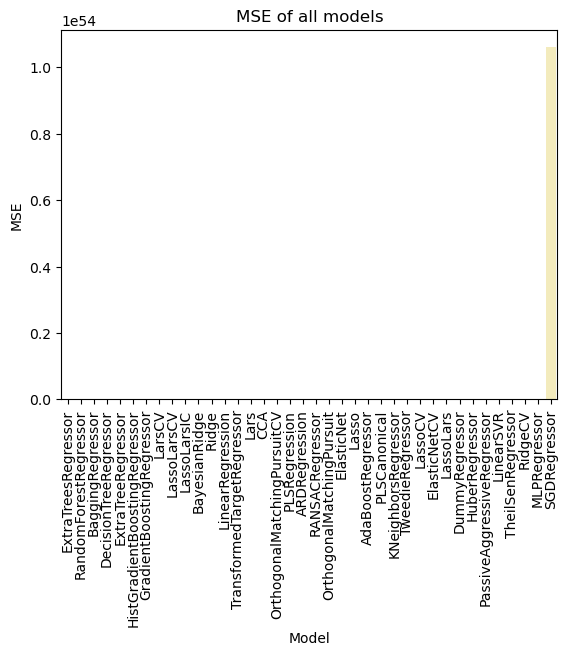

In [57]:
sns.barplot(x = 'Model', y = 'MSE', data = df_compare, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE of all models')
plt.show()

In [58]:
df_compare = df_compare.sort_values(by = ['RMSE'], ascending = True)
best_model = pd.concat([best_model, df_compare.sort_values(by = ['MSE'], ascending = True).head(5)])
df_compare.head()

,Regressor,Model,MSE,RMSE,R2
0,"(ExtraTreeRegressor(random_state=488204610), E...",ExtraTreesRegressor,0.003991,0.063176,0.998983
0,"(DecisionTreeRegressor(max_features='auto', ra...",RandomForestRegressor,0.004673,0.068360,0.998810
0,(DecisionTreeRegressor(random_state=172928921)...,BaggingRegressor,0.004994,0.070670,0.998728
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.006693,0.081810,0.998295
0,ExtraTreeRegressor(),ExtraTreeRegressor,0.007164,0.084641,0.998175


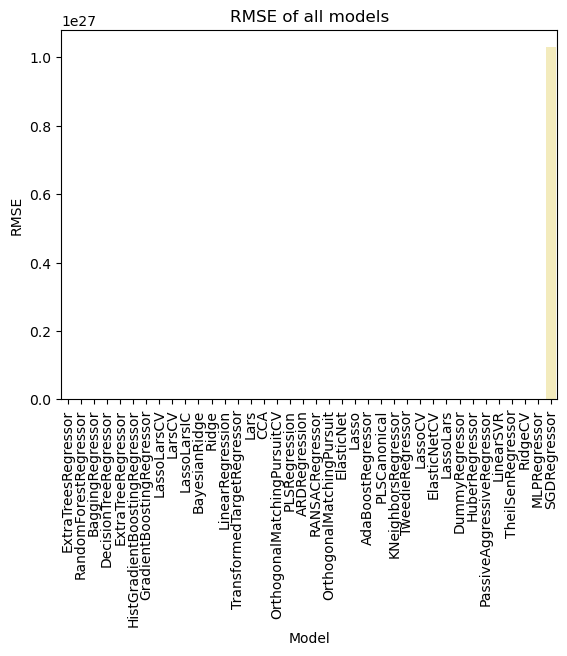

In [59]:
sns.barplot(x = 'Model', y = 'RMSE', data = df_compare, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of all models')
plt.show()

In [60]:
df_compare = df_compare[df_compare['R2'] > 0]
df_compare = df_compare.sort_values(by = ['R2'], ascending = False)
best_model = pd.concat([best_model, df_compare.sort_values(by = ['MSE'], ascending = True).head(5)])
df_compare.head()

,Regressor,Model,MSE,RMSE,R2
0,"(ExtraTreeRegressor(random_state=488204610), E...",ExtraTreesRegressor,0.003991,0.063176,0.998983
0,"(DecisionTreeRegressor(max_features='auto', ra...",RandomForestRegressor,0.004673,0.068360,0.998810
0,(DecisionTreeRegressor(random_state=172928921)...,BaggingRegressor,0.004994,0.070670,0.998728
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.006693,0.081810,0.998295
0,ExtraTreeRegressor(),ExtraTreeRegressor,0.007164,0.084641,0.998175


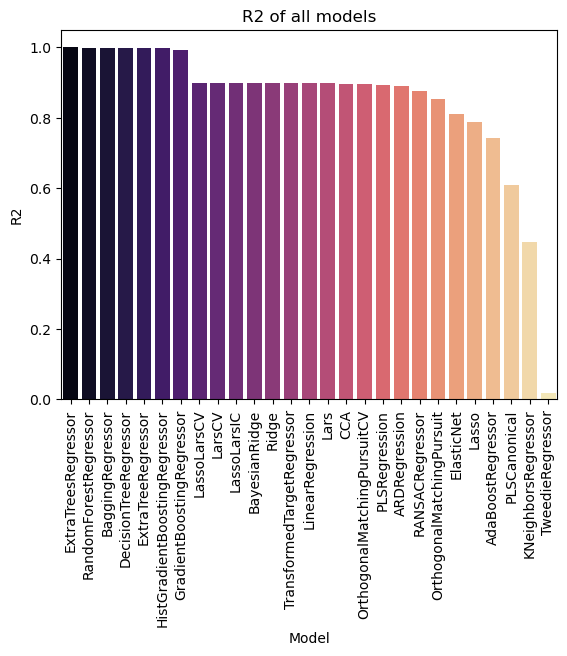

In [61]:
sns.barplot(x = 'Model', y = 'R2', data = df_compare, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 of all models')
plt.show()

Select the best possible model

In [62]:
best_model = best_model.drop_duplicates()
best_model

,Regressor,Model,MSE,RMSE,R2
0,"(ExtraTreeRegressor(random_state=488204610), E...",ExtraTreesRegressor,0.003991,0.063176,0.998983
0,"(DecisionTreeRegressor(max_features='auto', ra...",RandomForestRegressor,0.004673,0.068360,0.998810
0,(DecisionTreeRegressor(random_state=172928921)...,BaggingRegressor,0.004994,0.070670,0.998728
0,DecisionTreeRegressor(),DecisionTreeRegressor,0.006693,0.081810,0.998295
0,ExtraTreeRegressor(),ExtraTreeRegressor,0.007164,0.084641,0.998175


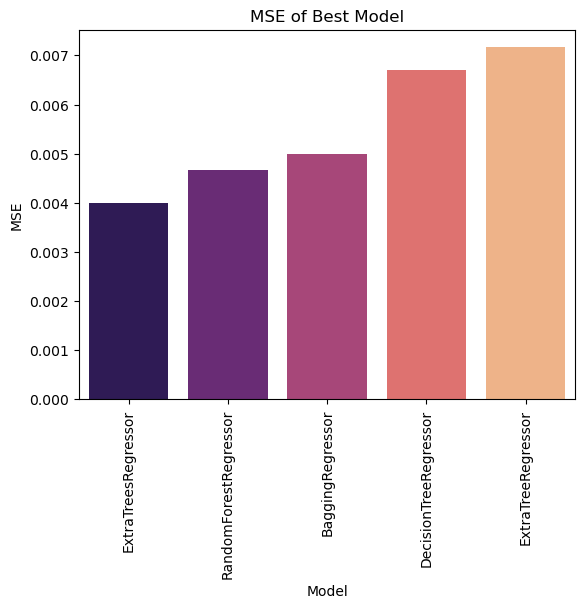

In [63]:
sns.barplot(x = 'Model', y = 'MSE', data = best_model, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE of Best Model')
plt.show()

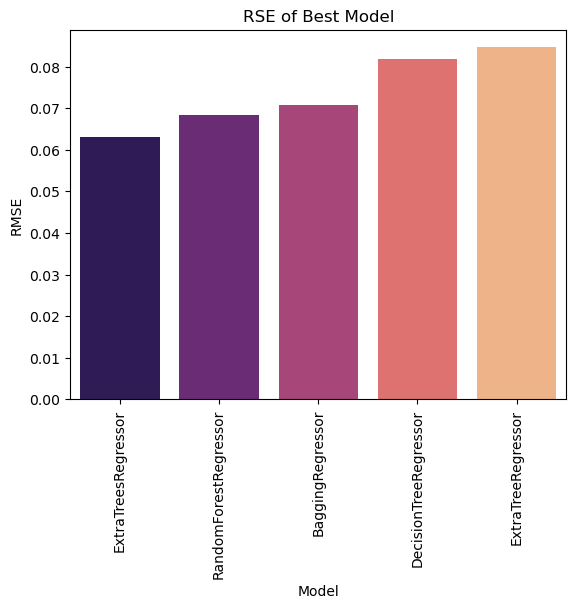

In [64]:
sns.barplot(x = 'Model', y = 'RMSE', data = best_model, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RSE of Best Model')
plt.show()

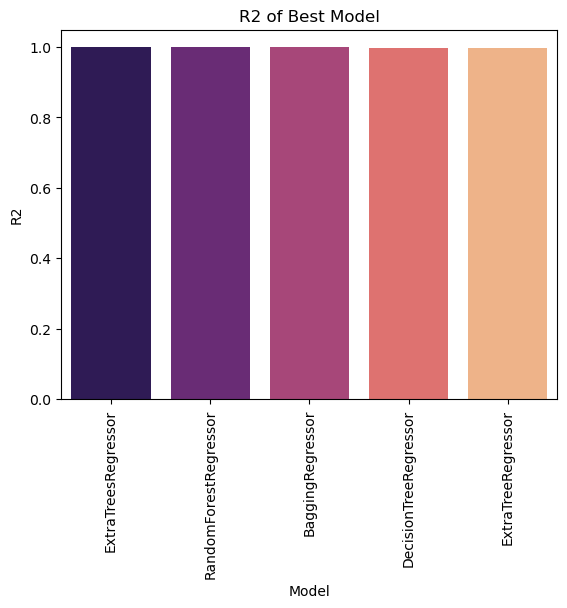

In [65]:
sns.barplot(x = 'Model', y = 'R2', data = best_model, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 of Best Model')
plt.show()

In [66]:
bestModel = set()

best_model = best_model.sort_values(by = ['MSE'], ascending = True)

for index, row in best_model.head(3).iterrows():
    bestModel.add(row['Regressor'])

best_model = best_model.sort_values(by = ['RMSE'], ascending = True)

for index, row in best_model.head(3).iterrows():
    bestModel.add(row['Regressor'])

best_model = best_model.sort_values(by = ['R2'], ascending = False)

for index, row in best_model.head(3).iterrows():
    bestModel.add(row['Regressor'])


Perform Hyperparameter tuning, select best hyperparameters by using appropriate algorithms Come up with the best possible model accuracy.

In [67]:
def hyperparam(model, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(estimator = model, param_grid = {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}, cv = 5, n_jobs = -1, verbose = 5)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print(grid_search.best_estimator_)
    y_pred = grid_search.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('R2: ', r2)
    return grid_search.best_estimator_, mse, rmse, r2

In [ ]:
for model in bestModel:
    try:
        print(model)
        hyperparam(model, X_train, y_train, X_test, y_test)            
    except:
        print('Error')

RandomForestRegressor()
Fitting 5 folds for each of 10 candidates, totalling 50 fits
